In [60]:
import re
import string
import nltk
import nlpaug.augmenter.word as naw
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


df = pd.read_csv('offensive.csv')
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


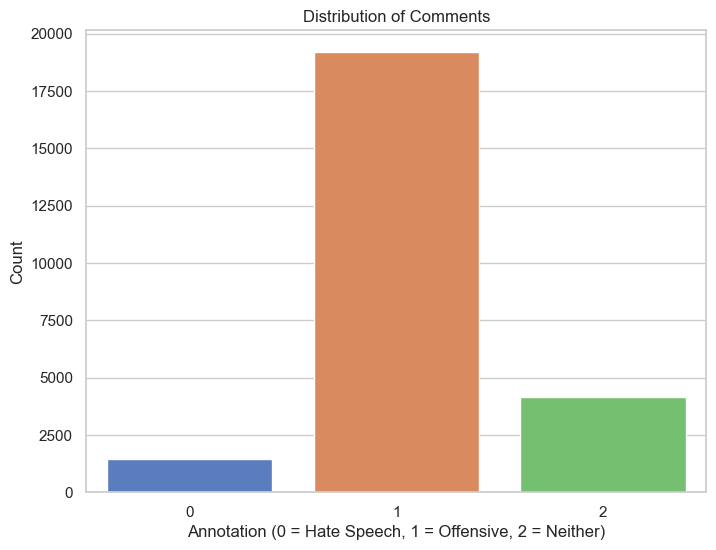

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='muted')
plt.title('Distribution of Comments')
plt.xlabel('Annotation (0 = Hate Speech, 1 = Offensive, 2 = Neither)')
plt.ylabel('Count')
plt.show()


In [62]:
import pandas as pd
import re
import contractions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from imblearn.over_sampling import RandomOverSampler


# Load SpaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess(text):
    # 1. Expand contractions
    text = contractions.fix(text)
    
    # 2. Convert to lowercase
    text = text.lower()
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # 4. Remove special characters and punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    text = re.sub(r'@\w+', '', text)
    
    # 4. Remove all instances of "rt" (case-insensitive)
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)
    
    # 5. Tokenize
    tokens = word_tokenize(text)
    
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 7. NER (Named Entity Recognition) - Remove named entities
    doc = nlp(" ".join(tokens))
    tokens = [token.text for token in doc if token.ent_type_ == ""]
    
    return " ".join(tokens)

# Apply preprocessing to the dataframe
df['processed_content'] = df['tweet'].apply(preprocess)

print("Before balancing:")
print(df)



Before balancing:
       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet 

In [63]:
# 8. Balance dataset using RandomOverSampler
X = df[['processed_content']]
y = df['class']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled data into a new dataframe
df= pd.concat([X_resampled, y_resampled], axis=1)

print("\nAfter balancing:")
df


After balancing:


,processed_content,class
0,mayasolovely a a woman you should not complain...,2
1,mleew17 boy dat coldtyga dwn bad for cuffin da...,1
2,urkindofbrand dawg you ever fuck a bitch and s...,1
3,vivabased she look like a tranny,1
4,shenikaroberts the shit you hear about me migh...,1
...,...,...
57565,ghetto bird can not fly away from my hood,2
57566,firecashman i do not want arod back,2
57567,petehelm yeah but sting wa already a proven dr...,2
57568,charlie4927 hi charlie have,2


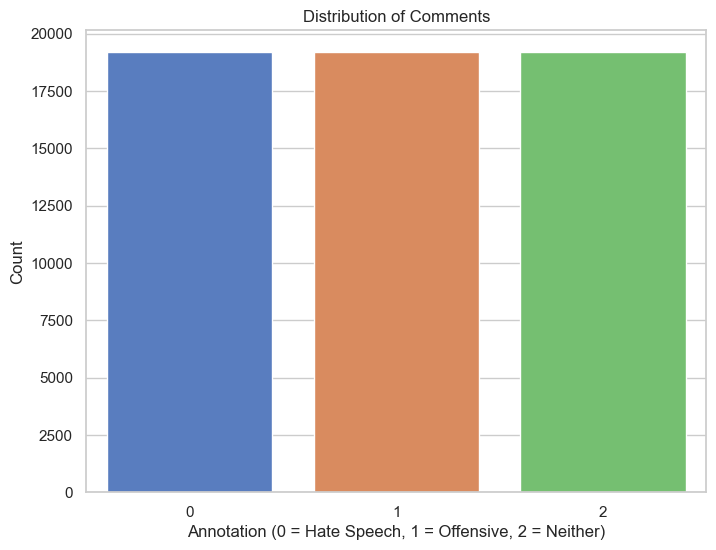

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='muted')
plt.title('Distribution of Comments')
plt.xlabel('Annotation (0 = Hate Speech, 1 = Offensive, 2 = Neither)')
plt.ylabel('Count')
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
tdf, df = train_test_split(df, test_size=0.2, random_state=42)


In [66]:
df

,processed_content,class
28100,whiteponyjr lmaoooo what a bunch of fag,0
38877,i know i hate fat loud bitch,0
31483,i hate all these industry fag i hope they all ...,0
1689,it is so wonderful when you meet a dude that i...,1
18056,whenrappersaids when tupac said i are not a ki...,1
...,...,...
5042,mite hit the rec i know cell marcus and try to...,1
46641,oreo ice cream cake,2
27089,bitch think it is their time to prosper,0
47233,that1guyjeff rebeccaisfresh carrot cake is tra...,2


In [67]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, AdamW, get_linear_schedule_with_warmup
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

class NLPDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128):
        self.texts = dataframe['processed_content'].tolist()
        self.labels = dataframe['class'].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def train_model(tdf, df):
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Prepare tokenizer and model
    tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
    model = DistilBertForSequenceClassification.from_pretrained(
        'distilbert-base-uncased', 
        num_labels=3  # 3 classes
    ).to(device)

    # Prepare datasets
    train_dataset = NLPDataset(tdf, tokenizer)
    test_dataset = NLPDataset(df, tokenizer)

    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    
    # Prepare optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0004)
    total_steps = len(train_dataloader) * 10
    warmup_steps = int(total_steps * 0.1)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, 
        num_warmup_steps=warmup_steps, 
        num_training_steps=total_steps
    )

    # Training loop
    model.train()
    for epoch in range(10):
        epoch_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/10')
        
        for batch in progress_bar:
            optimizer.zero_grad()
            
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids, 
                attention_mask=attention_mask, 
                labels=labels
            )
            
            loss = outputs.loss
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            
            epoch_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
        
        print(f'Epoch {epoch+1} Average Loss: {epoch_loss/len(train_dataloader)}')

    # Generate embeddings
    model.eval()
    
    def generate_embeddings(dataframe):
        embeddings = []
        dataset = NLPDataset(dataframe, tokenizer)
        dataloader = DataLoader(dataset, batch_size=16, shuffle=False)
        
        with torch.no_grad():
            for batch in tqdm(dataloader, desc='Generating Embeddings'):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                
                outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
                
                # Use the last hidden state's mean as embedding
                batch_embeddings = outputs.hidden_states[-1][:, 0, :].cpu().numpy()
                embeddings.extend(batch_embeddings)
        
        return embeddings

    # Generate and add embeddings to both dataframes
    tdf['bert_embeddings'] = generate_embeddings(tdf)
    df['bert_embeddings'] = generate_embeddings(df)

    # Save the fine-tuned model
    model.save_pretrained('./finetuned_distilbert_model')
    tokenizer.save_pretrained('./finetuned_distilbert_model')

    return model, tdf, df

# Usage
model, tdf, df = train_model(tdf, df)

Using device: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [68]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, AdamW, get_linear_schedule_with_warmup
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

class NLPDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=128):
        self.texts = dataframe['processed_content'].tolist()
        self.labels = dataframe['class'].tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def train_model(tdf, df):
    # Use CPU
    device = torch.device('cpu')
    print("Using CPU for training")

    # Prepare tokenizer and model
    tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
    model = DistilBertForSequenceClassification.from_pretrained(
        'distilbert-base-uncased', 
        num_labels=3  # 3 classes
    )

    # Prepare datasets
    train_dataset = NLPDataset(tdf, tokenizer)
    test_dataset = NLPDataset(df, tokenizer)

    train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    
    # Prepare optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.0004)
    total_steps = len(train_dataloader) * 10
    warmup_steps = int(total_steps * 0.1)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, 
        num_warmup_steps=warmup_steps, 
        num_training_steps=total_steps
    )

    # Training loop
    model.train()
    for epoch in range(10):
        epoch_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}/10')
        
        for batch in progress_bar:
            optimizer.zero_grad()
            
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']
            
            outputs = model(
                input_ids, 
                attention_mask=attention_mask, 
                labels=labels
            )
            
            loss = outputs.loss
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            
            epoch_loss += loss.item()
            progress_bar.set_postfix({'loss': loss.item()})
        
        print(f'Epoch {epoch+1} Average Loss: {epoch_loss/len(train_dataloader)}')

    # Generate embeddings
    def generate_embeddings(dataframe):
        embeddings = []
        dataset = NLPDataset(dataframe, tokenizer)
        dataloader = DataLoader(dataset, batch_size=16, shuffle=False)
        
        model.eval()
        with torch.no_grad():
            for batch in tqdm(dataloader, desc='Generating Embeddings'):
                input_ids = batch['input_ids']
                attention_mask = batch['attention_mask']
                
                outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
                
                # Use the last hidden state's mean as embedding
                batch_embeddings = outputs.hidden_states[-1][:, 0, :].numpy()
                embeddings.extend(batch_embeddings)
        
        return embeddings

    # Generate and add embeddings to both dataframes
    tdf['bert_embeddings'] = generate_embeddings(tdf)
    df['bert_embeddings'] = generate_embeddings(df)

    # Save the fine-tuned model
    model.save_pretrained('./finetuned_distilbert_model')
    tokenizer.save_pretrained('./finetuned_distilbert_model')

    return model, tdf, df

# Usage
model, tdf, df = train_model(tdf, df)

Using CPU for training


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\dasad\AppData\Roaming\Python\Python311\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10:   0%|          | 0/2879 [00:00<?, ?it/s]

Epoch 1 Average Loss: 0.5330220664184658


Epoch 2/10:   0%|          | 0/2879 [00:00<?, ?it/s]

KeyboardInterrupt: 